In [1]:
import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
img_height, img_width, img_channels = 180, 180, 3
batch_size=32
training="C:\\Users\\agnes\\Documents\\apziva_ai_residency\\project4\\data\\images\\training"
testing="C:\\Users\\agnes\\Documents\\apziva_ai_residency\\project4\\data\\images\\testing"
loading_dataste_seed = 0

In [3]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    training,
    validation_split=0.2,
    subset="training",
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 2392 files belonging to 2 classes.
Using 1914 files for training.


In [4]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    training,
    validation_split=0.2,
    subset="validation",
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 2392 files belonging to 2 classes.
Using 478 files for validation.


In [5]:
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    testing,
    seed=loading_dataste_seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
    )

Found 597 files belonging to 2 classes.


In [6]:
classes = train_data.class_names
shape = (img_height, img_width, img_channels)
data = (train_data, val_data, test_data)
train_data, val_data, test_data = data

In [7]:
inputs = Input(shape= shape)
layer1 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(inputs)
layer2 = MaxPooling2D((2,2))(layer1)
layer3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(layer2)
layer4 = MaxPooling2D((2,2))(layer3)
layer5 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(layer4)
layer6 = MaxPooling2D((2,2))(layer5)
layer7 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(layer6)
layer8 = Flatten()(layer7)
layer9 = Dense(32, activation='relu')(layer8)
outputs = Dense(len(classes), activation='softmax')(layer9)
fd_model = Model(inputs=inputs, outputs=outputs)

In [8]:
fd_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
fd_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9248  

In [9]:
fd_model_hist = fd_model.fit(
  train_data,
  validation_data=val_data,
  epochs=20
)

Epoch 1/20
60/60 [==============================] - 105s 2s/step - loss: 3.1439 - accuracy: 0.5585 - val_loss: 0.6832 - val_accuracy: 0.5523
Epoch 2/20
60/60 [==============================] - 104s 2s/step - loss: 0.6259 - accuracy: 0.6259 - val_loss: 0.5977 - val_accuracy: 0.6402
Epoch 3/20
60/60 [==============================] - 104s 2s/step - loss: 0.4618 - accuracy: 0.7795 - val_loss: 0.3610 - val_accuracy: 0.8285
Epoch 4/20
60/60 [==============================] - 103s 2s/step - loss: 0.2962 - accuracy: 0.8830 - val_loss: 0.4621 - val_accuracy: 0.7720
Epoch 5/20
60/60 [==============================] - 104s 2s/step - loss: 0.2356 - accuracy: 0.8955 - val_loss: 0.3524 - val_accuracy: 0.8494
Epoch 6/20
60/60 [==============================] - 104s 2s/step - loss: 0.2476 - accuracy: 0.9023 - val_loss: 0.1663 - val_accuracy: 0.9205
Epoch 7/20
60/60 [==============================] - 104s 2s/step - loss: 0.1094 - accuracy: 0.9572 - val_loss: 0.1528 - val_accuracy: 0.9435
Epoch 8/20
60

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
def eval_model(model, test_data):   
    results={}
    predicted_labels = []
    true_labels = []
    all_images = []
    for images, labels in test_data:
        true_labels.extend(labels.numpy())
        predicted_labels.extend(tf.argmax(model.predict(images), axis=1).numpy())

    # Accuracy
    results['accuracy'] = accuracy_score(true_labels, predicted_labels)
    
    # F1 Score
    results['f1_score'] = f1_score(true_labels, predicted_labels)
        
    cm = confusion_matrix(true_labels, predicted_labels)
    
    class_names = test_data.class_names
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
    return results

1/1 [==============================] - 0s 308ms/step


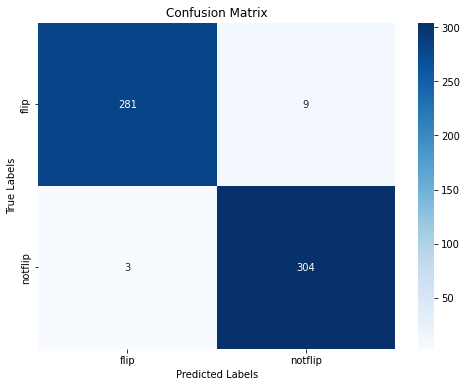

{'accuracy': 0.9798994974874372, 'f1_score': 0.9806451612903225}

In [11]:
import seaborn as sns
eval_model(fd_model, test_data)

In [13]:
fd_model_path = '../models/fd_model_v5.h5'
fd_model.save(fd_model_path)
fd_model_size = os.path.getsize(fd_model_path) / (1024 * 1024)
print('Model size: ', fd_model_size, 'MB')

Model size:  2.349884033203125 MB


In [ ]:
## custom cnn is best 